Downloading kaggle for including Dataset

In [ ]:
!pip install kaggle

Acessing Kaggle for Dataset upload

In [ ]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

# Set Kaggle API credentials as environment variables
os.environ['KAGGLE_USERNAME'] = "kotahimamanogna"
os.environ['KAGGLE_KEY'] = "158b223cb0b736d729a287aa694a0ff1"

# Authenticate with Kaggle
api = KaggleApi()
api.authenticate()

# Define and download the dataset
dataset_name = 'noulam/tomato'  # Replace with the dataset ID
download_path = r"C:\Users\kotah\Downloads\tomato_dataset"  # Destination folder
os.makedirs(download_path, exist_ok=True)  # Ensure the folder exists
api.dataset_download_files(dataset_name, path=download_path, unzip=True)

print(f"Dataset '{dataset_name}' downloaded and extracted to {download_path}.")


Dataset URL: https://www.kaggle.com/datasets/noulam/tomato
Dataset 'noulam/tomato' downloaded and extracted to C:\Users\kotah\Downloads\tomato_dataset.


Understanding Files and Folders

In [ ]:
import os

# Path to the dataset
dataset_path = r"C:\Users\kotah\Downloads\tomato_dataset"

# Print folder and file structure
for root, dirs, files in os.walk(dataset_path):
    print(f"Folder: {root}")
    if dirs:
        print(f"  Subfolders: {dirs}")
    if files:
        print(f"  Files: {files[:5]}... ({len(files)} files total)")  # Show first 5 files
    print("-" * 40)


Folder: C:\Users\kotah\Downloads\tomato_dataset
  Subfolders: ['New Plant Diseases Dataset(Augmented)', 'new plant diseases dataset(augmented)']
----------------------------------------
Folder: C:\Users\kotah\Downloads\tomato_dataset/New Plant Diseases Dataset(Augmented)
  Subfolders: ['train', 'valid']
----------------------------------------
Folder: C:\Users\kotah\Downloads\tomato_dataset/New Plant Diseases Dataset(Augmented)/train
  Subfolders: ['Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___healthy', 'Tomato___Septoria_leaf_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Leaf_Mold', 'Tomato___Early_blight', 'Tomato___Target_Spot', 'Tomato___Bacterial_spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Late_blight']
----------------------------------------
Folder: C:\Users\kotah\Downloads\tomato_dataset/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite
  Files: ['e4186179-9187-4c92-b6d2-fdb44ed67b96___Com.G_SpM_FL 9474.JPG'

Data preprocessing and assigning Train, Valid paths

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory
import os

# Define the image size and batch size
IMG_SIZE = (224, 224)  # Resize images to 224x224
BATCH_SIZE = 32

# Define directory paths
# Check if the directory exists and correct if needed
dataset_path = r"C:\Users\kotah\Downloads\tomato_dataset"
train_dir = os.path.join(dataset_path, "New Plant Diseases Dataset(Augmented)", "train")
valid_dir = os.path.join(dataset_path, "New Plant Diseases Dataset(Augmented)", "valid")

# If the directory still doesn't exist, it's possible there's an issue with
# the dataset download or extraction. Double-check the dataset structure.
if not os.path.exists(train_dir):
    raise FileNotFoundError(f"Training directory not found: {train_dir}")
if not os.path.exists(valid_dir):
    raise FileNotFoundError(f"Validation directory not found: {valid_dir}")

# ImageDataGenerator for training with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values to [0, 1]
    rotation_range=30,  # Random rotations
    width_shift_range=0.2,  # Random horizontal shift
    height_shift_range=0.2,  # Random vertical shift
    shear_range=0.2,  # Random shear transformation
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Random horizontal flip
    fill_mode="nearest"  # Fill pixels after transformations
)

# ImageDataGenerator for validation (only rescaling)
valid_datagen = ImageDataGenerator(rescale=1.0/255)

# Load the data using the ImageDataGenerator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # Categorical because we have multiple classes
    shuffle=True  # Shuffle the data for better training
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # Validation data should not be shuffled
)

# Check how the data looks
print(f"Training batches: {train_generator.samples}")
print(f"Validation batches: {valid_generator.samples}")

Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.
Training batches: 18345
Validation batches: 4585


Using Sequential of CNN

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    # Use the Input layer for the input shape
    tf.keras.layers.Input(shape=(224, 224, 3)),  # Define input shape

    # Convolutional layers
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Flattening the 3D output to 1D
    tf.keras.layers.Flatten(),

    # Fully connected layer
    tf.keras.layers.Dense(128, activation='relu'),

    # Output layer with softmax activation for multi-class classification
    tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')
])

# Model summary to check the architecture
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,170,250 (42.61 MB)

 Trainable params: 11,170,250 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

*functional model of CNN

In [ ]:
import tensorflow as tf

# Define the input layer
input_layer = tf.keras.layers.Input(shape=(224, 224, 3))

# First convolutional block
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(input_layer)
x = tf.keras.layers.MaxPooling2D(2, 2)(x)

# Second convolutional block
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2, 2)(x)

# Third convolutional block
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2, 2)(x)

# Flattening the 3D output to 1D
x = tf.keras.layers.Flatten()(x)

# Fully connected layer
x = tf.keras.layers.Dense(128, activation='relu')(x)

# Output layer with softmax activation for multi-class classification
output_layer = tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')(x)

# Define the model
functional_model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

# Model summary to check the architecture
functional_model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,170,250 (42.61 MB)

 Trainable params: 11,170,250 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

Model Compilation

In [ ]:
model.compile(
    optimizer='adam',               # Optimizer
    loss='categorical_crossentropy', # Loss function (for multi-class classification)
    metrics=['accuracy']            # Evaluation metric (accuracy)
)


Training Model with 10 Epochs

In [ ]:
history = model.fit(
    train_generator,  # The training data generator
    epochs=10,        # Number of epochs to train the model
    validation_data=valid_generator,  # The validation data generator
    verbose=1         # Displays progress during training
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


574/574 ━━━━━━━━━━━━━━━━━━━━ 2504s 4s/step - accuracy: 0.3104 - loss: 1.9237 - val_accuracy: 0.5490 - val_loss: 1.5399
Epoch 2/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 2555s 4s/step - accuracy: 0.7277 - loss: 0.7784 - val_accuracy: 0.7732 - val_loss: 0.6648
Epoch 3/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 2544s 4s/step - accuracy: 0.8202 - loss: 0.5208 - val_accuracy: 0.7760 - val_loss: 0.7546
Epoch 4/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 2440s 4s/step - accuracy: 0.8346 - loss: 0.4653 - val_accuracy: 0.7200 - val_loss: 0.9049
Epoch 5/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 2501s 4s/step - accuracy: 0.8549 - loss: 0.4030 - val_accuracy: 0.8648 - val_loss: 0.3727
Epoch 6/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 2461s 4s/step - accuracy: 0.8814 - loss: 0.3402 - val_accuracy: 0.8434 - val_loss: 0.4985
Epoch 7/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 2460s 4s/step - accuracy: 0.8898 - loss: 0.3082 - val_accuracy: 0.9210 - val_loss: 0.2212
Epoch 8/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 2445s 4s/step - accuracy: 0.8898 - loss: 0.3190 - val_accurac

Drive Mounting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Saving the Model to Drive

In [ ]:
# Save the model in the new Keras format
save_path = "/content/drive/MyDrive/ColabNotebooks"  # Update Google Drive path

# Ensure the directory exists
import os
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Save the model
model.save(os.path.join(save_path, "my_model.keras"))
print("Model saved successfully in .keras format.")


Model saved successfully in .keras format.


Loading the Model form Drive

In [ ]:
# Example: Loading a model from Google Drive
model = tf.keras.models.load_model('/content/drive/MyDrive/ColabNotebooks/my_model.keras')
print("Model loaded successfully.")


Model loaded successfully.


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Printing the weights of first Layer

In [ ]:
# Inspect the first layer's weights
weights = model.layers[0].get_weights()
print("First layer weights:", weights)


First layer weights: [array([[[[ 7.89236873e-02, -5.04325330e-02, -1.25984162e-01,
          -1.68637261e-02, -6.90578893e-02, -1.24785937e-01,
          -1.30720690e-01,  1.25367537e-01, -5.24009019e-02,
          -9.20995325e-02, -4.04523164e-02,  1.24773100e-01,
           1.16040453e-01,  6.07642382e-02, -3.38423848e-02,
           1.61124766e-03, -1.07955188e-01, -1.25428200e-01,
          -6.48599118e-02, -8.61845165e-02,  1.10010132e-01,
           1.01699412e-01, -7.69426823e-02, -3.64681929e-02,
          -1.00538135e-03, -2.42688358e-02, -1.26313716e-01,
           6.99583292e-02, -1.17210440e-01, -3.38353440e-02,
          -4.66753244e-02, -2.39553824e-02],
         [ 1.18000731e-01, -1.21100850e-01,  4.50287610e-02,
           7.03440458e-02,  1.20180532e-01, -2.89691985e-02,
           6.42125756e-02, -1.68200284e-02, -6.61383346e-02,
           3.22174132e-02,  6.57226443e-02, -1.17814936e-01,
          -1.23772301e-01,  4.06521857e-02, -1.32593647e-01,
          -5.64078

Improving the accuracy with Training

In [ ]:
import time
from tensorflow.keras.callbacks import ModelCheckpoint

# Create a unique filename with a timestamp to avoid overwriting
timestamp = time.strftime("%Y%m%d-%H%M%S")
model_save_path = f'/content/drive/MyDrive/ColabNotebooks/new_model_{timestamp}.keras'

# Set up ModelCheckpoint to save the model after each epoch
checkpoint = ModelCheckpoint(
    filepath=model_save_path,
    monitor='val_loss',  # You can change this to another metric if you want
    save_best_only=False,  # Save after every epoch
    save_weights_only=False,  # Save the full model (architecture, weights, optimizer state)
    verbose=1  # Display messages when saving the model
)

# Start training and save the model after each epoch
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=10,  # Specify the number of epochs for training
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // BATCH_SIZE,
    callbacks=[checkpoint]  # Add the ModelCheckpoint callback
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


573/573 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3018 - loss: 1.9908
Epoch 1: saving model to /content/drive/MyDrive/ColabNotebooks/new_model_20241217-014608.keras
573/573 ━━━━━━━━━━━━━━━━━━━━ 2555s 4s/step - accuracy: 0.3021 - loss: 1.9900 - val_accuracy: 0.6742 - val_loss: 0.9967
Epoch 2/10
  1/573 ━━━━━━━━━━━━━━━━━━━━ 44:42 5s/step - accuracy: 0.7500 - loss: 0.7679

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: saving model to /content/drive/MyDrive/ColabNotebooks/new_model_20241217-014608.keras
573/573 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7500 - loss: 0.7679 - val_accuracy: 0.8889 - val_loss: 0.3509
Epoch 3/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6949 - loss: 0.8803
Epoch 3: saving model to /content/drive/MyDrive/ColabNotebooks/new_model_20241217-014608.keras
573/573 ━━━━━━━━━━━━━━━━━━━━ 2588s 5s/step - accuracy: 0.6949 - loss: 0.8802 - val_accuracy: 0.6377 - val_loss: 1.6943
Epoch 4/10
  1/573 ━━━━━━━━━━━━━━━━━━━━ 31:25 3s/step - accuracy: 0.7188 - loss: 0.7381
Epoch 4: saving model to /content/drive/MyDrive/ColabNotebooks/new_model_20241217-014608.keras
573/573 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7188 - loss: 0.7381 - val_accuracy: 1.0000 - val_loss: 0.0091
Epoch 5/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7944 - loss: 0.6122
Epoch 5: saving model to /content/drive/MyDrive/ColabNotebooks/new_model_20241217-014608.keras
573/573 

In [ ]:
# Evaluate the model on the validation dataset
loss, accuracy = model.evaluate(valid_generator, steps=valid_generator.samples // BATCH_SIZE)

# Print accuracy as a percentage
print(f"Final Validation Accuracy: {accuracy * 100:.2f}%")


143/143 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.8313 - loss: 0.5697
Final Validation Accuracy: 78.21%


In [ ]:
from tensorflow.keras.models import load_model

# Load the last saved model
model = load_model('/content/drive/MyDrive/ColabNotebooks/new_model_20241217-014608.keras')

# Continue training from where it left off
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=2,  # Continue for more epochs
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // BATCH_SIZE,
    callbacks=[checkpoint]  # Keep saving after each epoch
)


Epoch 1/2
573/573 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8764 - loss: 0.3840
Epoch 1: saving model to /content/drive/MyDrive/ColabNotebooks/new_model_20241217-014608.keras
573/573 ━━━━━━━━━━━━━━━━━━━━ 2521s 4s/step - accuracy: 0.8764 - loss: 0.3840 - val_accuracy: 0.8300 - val_loss: 0.6730
Epoch 2/2
  1/573 ━━━━━━━━━━━━━━━━━━━━ 31:58 3s/step - accuracy: 1.0000 - loss: 0.1030
Epoch 2: saving model to /content/drive/MyDrive/ColabNotebooks/new_model_20241217-014608.keras
573/573 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 1.0000 - loss: 0.1030 - val_accuracy: 1.0000 - val_loss: 4.0750e-05


In [ ]:
# Evaluate the model on the validation dataset
loss, accuracy = model.evaluate(valid_generator, steps=valid_generator.samples // BATCH_SIZE)

# Print accuracy as a percentage
print(f"Final Validation Accuracy: {accuracy * 100:.2f}%")


143/143 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.8273 - loss: 0.5444
Final Validation Accuracy: 84.33%


In [ ]:
from tensorflow.keras.models import load_model

# Load the last saved model
model = load_model('/content/drive/MyDrive/ColabNotebooks/new_model_20241217-014608.keras')

# Continue training from where it left off
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs = 2,  # Continue for more epochs
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // BATCH_SIZE,
    callbacks=[checkpoint]  # Keep saving after each epoch
)


Epoch 1/2
573/573 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8936 - loss: 0.3277
Epoch 1: saving model to /content/drive/MyDrive/ColabNotebooks/new_model_20241217-014608.keras
573/573 ━━━━━━━━━━━━━━━━━━━━ 2589s 5s/step - accuracy: 0.8936 - loss: 0.3277 - val_accuracy: 0.8440 - val_loss: 0.5850
Epoch 2/2
  1/573 ━━━━━━━━━━━━━━━━━━━━ 46:18 5s/step - accuracy: 0.8750 - loss: 0.2915
Epoch 2: saving model to /content/drive/MyDrive/ColabNotebooks/new_model_20241217-014608.keras
573/573 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8750 - loss: 0.2915 - val_accuracy: 1.0000 - val_loss: 1.0508e-04


In [ ]:
# Evaluate the model on the validation dataset
loss, accuracy = model.evaluate(valid_generator, steps=valid_generator.samples // BATCH_SIZE)

# Print accuracy as a percentage
print(f"Final Validation Accuracy: {accuracy * 100:.2f}%")


143/143 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.8766 - loss: 0.4293
Final Validation Accuracy: 88.00%


In [ ]:
from tensorflow.keras.models import load_model

# Load the last saved model
model = load_model('/content/drive/MyDrive/ColabNotebooks/new_model_20241217-014608.keras')

# Continue training from where it left off
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs = 2,  # Continue for more epochs
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // BATCH_SIZE,
    callbacks=[checkpoint]  # Keep saving after each epoch
)


Epoch 1/2
573/573 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9026 - loss: 0.2948
Epoch 1: saving model to /content/drive/MyDrive/ColabNotebooks/new_model_20241217-014608.keras
573/573 ━━━━━━━━━━━━━━━━━━━━ 2553s 4s/step - accuracy: 0.9026 - loss: 0.2948 - val_accuracy: 0.8625 - val_loss: 0.5416
Epoch 2/2
  1/573 ━━━━━━━━━━━━━━━━━━━━ 37:11 4s/step - accuracy: 0.9062 - loss: 0.6610
Epoch 2: saving model to /content/drive/MyDrive/ColabNotebooks/new_model_20241217-014608.keras
573/573 ━━━━━━━━━━━━━━━━━━━━ 40s 63ms/step - accuracy: 0.9062 - loss: 0.6610 - val_accuracy: 1.0000 - val_loss: 3.0351e-04


In [ ]:
# Evaluate the model on the validation dataset
loss, accuracy = model.evaluate(valid_generator, steps=valid_generator.samples // BATCH_SIZE)

# Print accuracy as a percentage
print(f"Final Validation Accuracy: {accuracy * 100:.2f}%")


143/143 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.7635 - loss: 0.9527
Final Validation Accuracy: 79.46%


In [ ]:
# Evaluate the model on the validation dataset
loss, accuracy = model.evaluate(valid_generator, steps=valid_generator.samples // BATCH_SIZE)

# Print accuracy as a percentage
print(f"Final Validation Accuracy: {accuracy * 100:.2f}%")


143/143 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.7635 - loss: 0.9527
Final Validation Accuracy: 79.46%


In [ ]:
# Define a new save path for the current model
new_model_path = '/content/drive/MyDrive/ColabNotebooks/newest_model.keras'

# Save the current model to the new path
model.save(new_model_path)

print(f"Model saved successfully to: {new_model_path}")


Model saved successfully to: /content/drive/MyDrive/ColabNotebooks/newest_model.keras


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('/content/drive/MyDrive/ColabNotebooks/new_model_20241217-014608.keras')

# Recompile the model
model.compile(
    optimizer='adam',               # Use the same optimizer as during training
    loss='categorical_crossentropy', # Use the same loss function
    metrics=['accuracy']            # Track accuracy
)

# Evaluate the model
loss, accuracy = model.evaluate(valid_generator, steps=valid_generator.samples // BATCH_SIZE)

# Print the accuracy
print(f"Validation Accuracy: {accuracy * 100:.2f}%")
print(f"Validation Loss: {loss:.4f}")


143/143 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.7635 - loss: 0.9527
Validation Accuracy: 79.46%
Validation Loss: 0.9178


Plotting for Accuracy and Loss

573/573 ━━━━━━━━━━━━━━━━━━━━ 898s 2s/step - accuracy: 0.9010 - loss: 0.2839
143/143 ━━━━━━━━━━━━━━━━━━━━ 172s 1s/step - accuracy: 0.7635 - loss: 0.9527


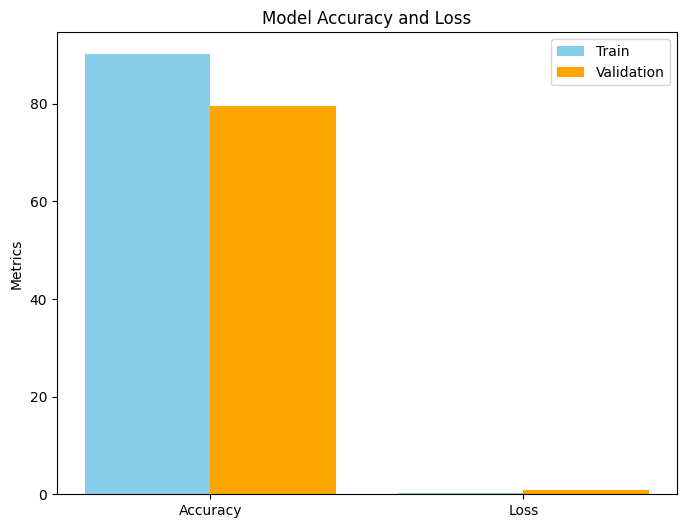

In [ ]:
import matplotlib.pyplot as plt

# Evaluate on training and validation data
train_loss, train_acc = model.evaluate(train_generator, steps=train_generator.samples // BATCH_SIZE, verbose=1)
val_loss, val_acc = model.evaluate(valid_generator, steps=valid_generator.samples // BATCH_SIZE, verbose=1)

# Plot accuracy and loss
metrics = ['Accuracy', 'Loss']
train_metrics = [train_acc * 100, train_loss]
val_metrics = [val_acc * 100, val_loss]

# Plot bar chart
plt.figure(figsize=(8, 6))
x = range(len(metrics))
plt.bar(x, train_metrics, width=0.4, label='Train', color='skyblue', align='center')
plt.bar([i + 0.4 for i in x], val_metrics, width=0.4, label='Validation', color='orange', align='center')

plt.xticks([i + 0.2 for i in x], metrics)
plt.ylabel('Metrics')
plt.title('Model Accuracy and Loss')
plt.legend()
plt.show()


 **Training Dataset Class Distribution Plot**

Class distribution in the Training Dataset:


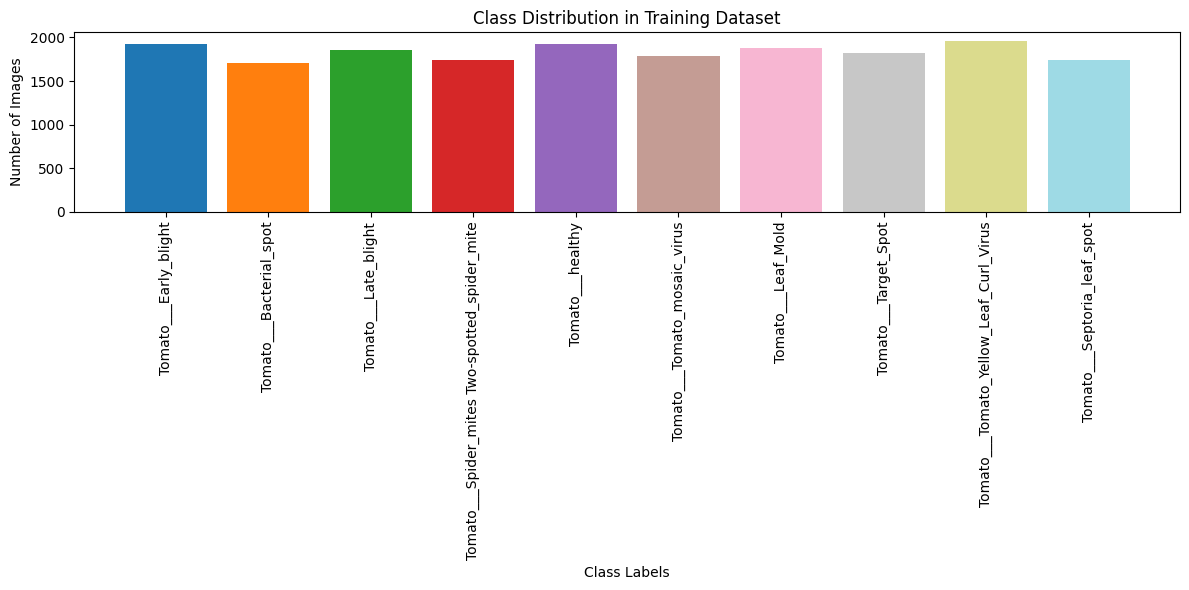

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Define the path for the training directory
base_dir = r"/content/C:\Users\kotah\Downloads\tomato_dataset/New Plant Diseases Dataset(Augmented)"
train_dir = os.path.join(base_dir, "train")

# Function to count images in each class folder
def count_images_in_classes(directory):
    class_names = []
    class_counts = []

    # List all class folders
    for class_folder in os.listdir(directory):
        class_path = os.path.join(directory, class_folder)
        if os.path.isdir(class_path):  # Check if it's a directory
            class_names.append(class_folder)
            class_counts.append(len(os.listdir(class_path)))  # Count images
    return class_names, class_counts

# Generate a bar plot with unique colors for each class
def plot_class_distribution_with_colors(directory, title):
    class_names, class_counts = count_images_in_classes(directory)

    # Generate unique colors for each class
    colors = plt.cm.tab20(np.linspace(0, 1, len(class_names)))  # tab20 colormap

    plt.figure(figsize=(12, 6))
    plt.bar(class_names, class_counts, color=colors)
    plt.xticks(rotation=90)
    plt.xlabel('Class Labels')
    plt.ylabel('Number of Images')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Plot for Training Folder
print("Class distribution in the Training Dataset:")
plot_class_distribution_with_colors(train_dir, "Class Distribution in Training Dataset")


**Validation Dataset Class Distribution Plot**


Class distribution in the Validation Dataset:


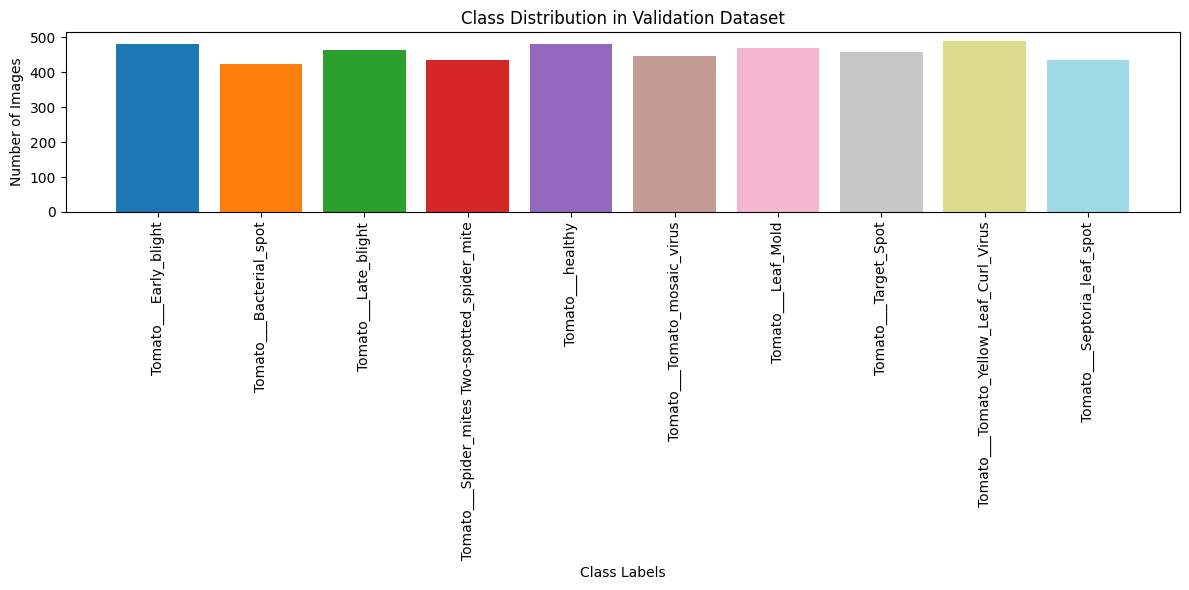

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Define the path for the validation directory
valid_dir = r"/content/C:\Users\kotah\Downloads\tomato_dataset/New Plant Diseases Dataset(Augmented)/valid"

# Function to count images in each class folder
def count_images_in_classes(directory):
    class_names = []
    class_counts = []

    # List all class folders
    for class_folder in os.listdir(directory):
        class_path = os.path.join(directory, class_folder)
        if os.path.isdir(class_path):  # Check if it's a directory
            class_names.append(class_folder)
            class_counts.append(len(os.listdir(class_path)))  # Count images
    return class_names, class_counts

# Generate a bar plot with unique colors for each class
def plot_class_distribution_with_colors(directory, title):
    class_names, class_counts = count_images_in_classes(directory)

    # Generate unique colors for each class
    colors = plt.cm.tab20(np.linspace(0, 1, len(class_names)))  # tab20 colormap

    plt.figure(figsize=(12, 6))
    plt.bar(class_names, class_counts, color=colors)
    plt.xticks(rotation=90)
    plt.xlabel('Class Labels')
    plt.ylabel('Number of Images')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Plot for Validation Folder
print("Class distribution in the Validation Dataset:")
plot_class_distribution_with_colors(valid_dir, "Class Distribution in Validation Dataset")


**Precision, F1 score, Recall**, **Support**





In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Load your pre-trained model
model = tf.keras.models.load_model(r"/content/drive/MyDrive/ColabNotebooks/best_model.keras")  # Replace with your actual model path

# 2. Set up the test data generator (assuming you have test data already)
test_data_dir = r"/content/C:\Users\kotah\Downloads\tomato_dataset/New Plant Diseases Dataset(Augmented)/valid"  # Replace with your test dataset path
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),  # Match the input size of your model
    batch_size=32,
    class_mode='categorical',  # Use categorical if you have multiple classes
    shuffle=False  # Ensure that the order of samples is kept consistent
)

# 3. Generate predictions for the test set
predicted_probs = model.predict(test_generator)  # Get predicted probabilities
predicted_labels = np.argmax(predicted_probs, axis=1)  # Convert probabilities to class labels

# 4. True labels (ground truth)
y_test = test_generator.classes  # Ground truth labels from the test dataset

# 5. Calculate Precision, Recall, and F1 score

# Precision
precision_per_class = precision_score(y_test, predicted_labels, average=None)
print("Precision per class:", precision_per_class)

# Recall
recall_per_class = recall_score(y_test, predicted_labels, average=None)
print("Recall per class:", recall_per_class)

# F1 Score
f1_per_class = f1_score(y_test, predicted_labels, average=None)
print("F1 Score per class:", f1_per_class)

# Calculate overall micro, macro, and weighted scores
precision_micro = precision_score(y_test, predicted_labels, average='micro')
precision_macro = precision_score(y_test, predicted_labels, average='macro')
precision_weighted = precision_score(y_test, predicted_labels, average='weighted')

recall_micro = recall_score(y_test, predicted_labels, average='micro')
recall_macro = recall_score(y_test, predicted_labels, average='macro')
recall_weighted = recall_score(y_test, predicted_labels, average='weighted')

f1_micro = f1_score(y_test, predicted_labels, average='micro')
f1_macro = f1_score(y_test, predicted_labels, average='macro')
f1_weighted = f1_score(y_test, predicted_labels, average='weighted')

# Print overall metrics
print(f"Micro Precision: {precision_micro:.4f}")
print(f"Macro Precision: {precision_macro:.4f}")
print(f"Weighted Precision: {precision_weighted:.4f}")
print(f"Micro Recall: {recall_micro:.4f}")
print(f"Macro Recall: {recall_macro:.4f}")
print(f"Weighted Recall: {recall_weighted:.4f}")
print(f"Micro F1 Score: {f1_micro:.4f}")
print(f"Macro F1 Score: {f1_macro:.4f}")
print(f"Weighted F1 Score: {f1_weighted:.4f}")

# 6. Print classification report (optional, but useful for detailed evaluation)
class_names = ['Tomato - Early Blight', 'Tomato - Bacterial Spot', 'Tomato - Late Blight',
               'Tomato - Spider Mites (Two-spotted)', 'Tomato - Healthy', 'Tomato - Tomato Mosaic Virus',
               'Tomato - Leaf Mold', 'Tomato - Target Spot', 'Tomato - Yellow Leaf Curl Virus',
               'Tomato - Septoria Leaf Spot']  # Ensure there are 10 class names

# Now use the classification report with the correct number of class names
report = classification_report(y_test, predicted_labels, target_names=class_names)
print("\nClassification Report:\n", report)


Found 4585 images belonging to 10 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


144/144 ━━━━━━━━━━━━━━━━━━━━ 177s 1s/step
Precision per class: [0.92170022 0.82234432 0.95733333 0.99662162 0.7176259  0.90342679
 0.79764244 0.97085202 0.96035242 0.75748031]
Recall per class: [0.96941176 0.93541667 0.77537797 0.62765957 0.91513761 0.66666667
 0.88840263 0.88367347 0.97321429 1.        ]
F1 Score per class: [0.94495413 0.87524366 0.85680191 0.77023499 0.80443548 0.76719577
 0.84057971 0.92521368 0.96674058 0.86200717]
Micro Precision: 0.8637
Macro Precision: 0.8805
Weighted Precision: 0.8809
Micro Recall: 0.8637
Macro Recall: 0.8635
Weighted Recall: 0.8637
Micro F1 Score: 0.8637
Macro F1 Score: 0.8613
Weighted F1 Score: 0.8615

Classification Report:
                                      precision    recall  f1-score   support

              Tomato - Early Blight       0.92      0.97      0.94       425
            Tomato - Bacterial Spot       0.82      0.94      0.88       480
               Tomato - Late Blight       0.96      0.78      0.86       463
Tomato - Spid

Plotting  graph for Precision, Recall, F1 score


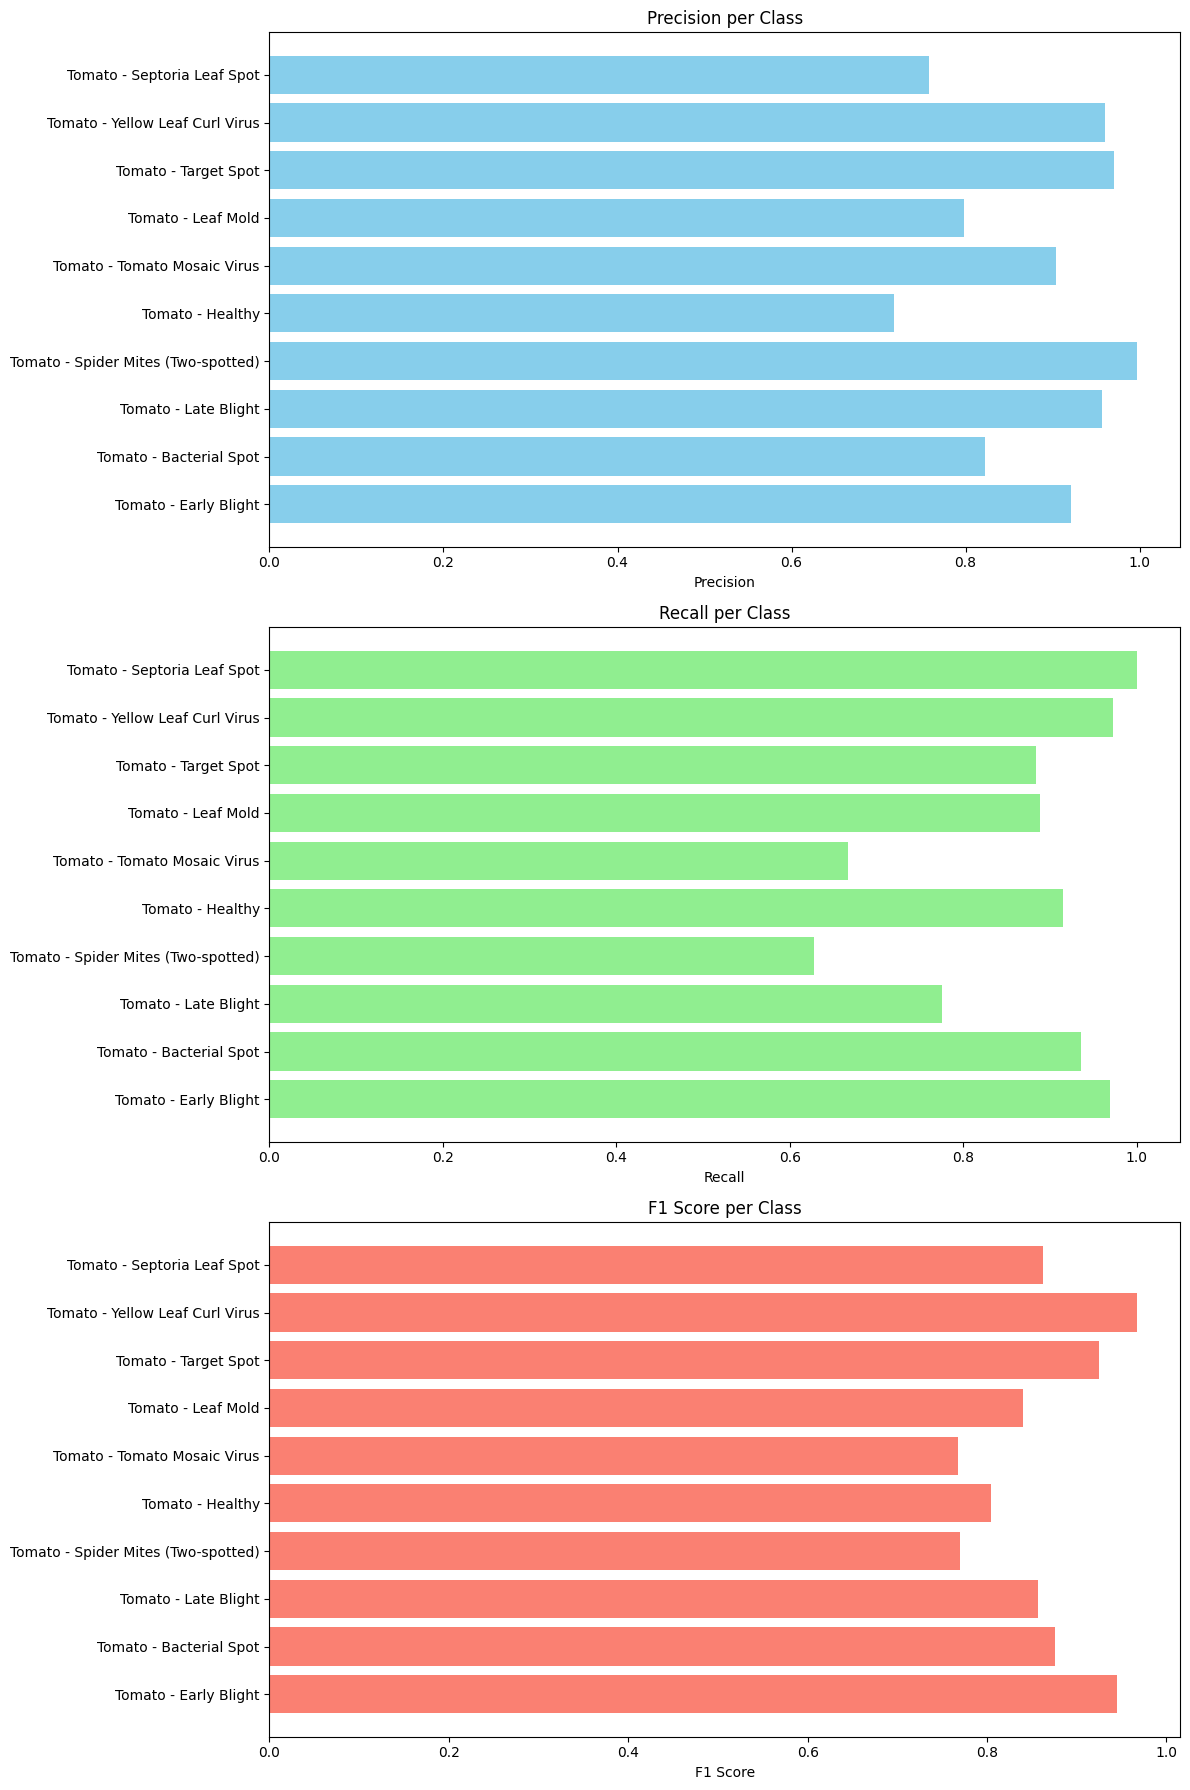

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Values from the output
precision_per_class = [0.92170022, 0.82234432, 0.95733333, 0.99662162, 0.7176259,
                       0.90342679, 0.79764244, 0.97085202, 0.96035242, 0.75748031]

recall_per_class = [0.96941176, 0.93541667, 0.77537797, 0.62765957, 0.91513761,
                    0.66666667, 0.88840263, 0.88367347, 0.97321429, 1.0]

f1_per_class = [0.94495413, 0.87524366, 0.85680191, 0.77023499, 0.80443548,
                0.76719577, 0.84057971, 0.92521368, 0.96674058, 0.86200717]

# Class names (as provided in the report)
class_names = ['Tomato - Early Blight', 'Tomato - Bacterial Spot', 'Tomato - Late Blight',
               'Tomato - Spider Mites (Two-spotted)', 'Tomato - Healthy', 'Tomato - Tomato Mosaic Virus',
               'Tomato - Leaf Mold', 'Tomato - Target Spot', 'Tomato - Yellow Leaf Curl Virus',
               'Tomato - Septoria Leaf Spot']

# Plotting Precision, Recall, and F1 Score
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Precision Plot
axes[0].barh(class_names, precision_per_class, color='skyblue')
axes[0].set_xlabel('Precision')
axes[0].set_title('Precision per Class')

# Recall Plot
axes[1].barh(class_names, recall_per_class, color='lightgreen')
axes[1].set_xlabel('Recall')
axes[1].set_title('Recall per Class')

# F1 Score Plot
axes[2].barh(class_names, f1_per_class, color='salmon')
axes[2].set_xlabel('F1 Score')
axes[2].set_title('F1 Score per Class')

# Adjust layout to avoid overlapping
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


Training Model to increase Accuracy and keeping check points so the model do not overfit

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# Load the existing model
model_path = "/content/drive/MyDrive/ColabNotebooks/new_model_20241217-014608.keras"
model = load_model(model_path)

# Re-compile the model (required before training)
model.compile(
    optimizer='adam',               # Optimizer
    loss='categorical_crossentropy', # Loss function (for multi-class classification)
    metrics=['accuracy']            # Evaluation metric (accuracy)
)

# Define ModelCheckpoint callback to save the model after every epoch
checkpoint = ModelCheckpoint(
    filepath='/content/drive/MyDrive/ColabNotebooks/best_model.keras',  # Always save to best_model.keras
    monitor='val_loss',       # Monitor validation loss
    save_best_only=False,     # Save after every epoch regardless of validation improvement
    verbose=1
)

# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    verbose=1,
    min_lr=1e-6
)

# EarlyStopping callback to stop training when validation loss doesn't improve
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights=True
)

# Train the loaded model and save it every epoch
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=2,  # Adjust the number of epochs as needed
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // BATCH_SIZE,
    callbacks=[checkpoint, reduce_lr, early_stopping]  # Callbacks for training
)


Epoch 1/2
573/573 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9062 - loss: 0.2648
Epoch 1: saving model to /content/drive/MyDrive/ColabNotebooks/best_model.keras
573/573 ━━━━━━━━━━━━━━━━━━━━ 2578s 4s/step - accuracy: 0.9062 - loss: 0.2647 - val_accuracy: 0.8674 - val_loss: 0.4589 - learning_rate: 0.0010
Epoch 2/2
  1/573 ━━━━━━━━━━━━━━━━━━━━ 47:46 5s/step - accuracy: 0.9062 - loss: 0.2649

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: saving model to /content/drive/MyDrive/ColabNotebooks/best_model.keras
573/573 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9062 - loss: 0.2649 - val_accuracy: 1.0000 - val_loss: 4.1061e-07 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 2.


In [ ]:
# Evaluate the model on the validation dataset
loss, accuracy = model.evaluate(valid_generator, steps=valid_generator.samples // BATCH_SIZE)

# Print accuracy as a percentage
print(f"Final Validation Accuracy: {accuracy * 100:.2f}%")


143/143 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - accuracy: 0.8703 - loss: 0.4417
Final Validation Accuracy: 86.34%


In [ ]:
from tensorflow.keras.models import load_model

# Path to the saved model
model_path = '/content/drive/MyDrive/ColabNotebooks/best_model.keras'

# Load the model
model = load_model(model_path)

print("Model loaded successfully from", model_path)

Model loaded successfully from /content/drive/MyDrive/ColabNotebooks/best_model.keras


Prediction of class label


In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Path to the saved model
model_path = '/content/drive/MyDrive/ColabNotebooks/best_model.keras'

# Load the trained model
model = load_model(model_path)
print("Model loaded successfully from", model_path)

# Define the class labels (replace these with your class names in the order of training)
class_names = [
    "Bacterial Spot",
    "Early Blight",
    "Late Blight",
    "Leaf Mold",
    "Septoria Leaf Spot",
    "Spider Mites",
    "Target Spot",
    "Yellow Leaf Curl Virus",
    "Mosaic Virus",
    "Healthy"
]

# Function to predict the disease from an image
def predict_tomato_disease(image_path, model, class_names):
    """
    Predict the disease for a given tomato leaf image.

    Parameters:
        image_path (str): Path to the input image.
        model (Model): Loaded Keras model.
        class_names (list): List of class labels.

    Returns:
        str: Predicted class label.
    """
    try:
        # Load and preprocess the image
        img = load_img(image_path, target_size=(224, 224))  # Resize to match model input
        img_array = img_to_array(img)  # Convert to numpy array
        img_array = img_array / 255.0  # Normalize the pixel values to [0, 1]
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        # Predict the class probabilities
        predictions = model.predict(img_array)
        predicted_class_index = np.argmax(predictions, axis=1)[0]
        predicted_class_label = class_names[predicted_class_index]

        # Print the predictions (optional)
        print(f"Class Probabilities: {predictions[0]}")

        # Return the predicted label
        return predicted_class_label
    except Exception as e:
        print("Error during prediction:", e)
        return None

# Test prediction
test_image_path = r"/content/drive/MyDrive/Late_Blight_tomatoes_featured.jpg"
predicted_label = predict_tomato_disease(test_image_path, model, class_names)

if predicted_label:
    print(f"Predicted Tomato Leaf Disease: {predicted_label}")


Model loaded successfully from /content/drive/MyDrive/ColabNotebooks/best_model.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Class Probabilities: [9.2196228e-19 4.1082336e-04 9.9950778e-01 1.1412691e-15 8.1369362e-05
 5.2084085e-18 3.0488688e-11 6.7949307e-20 2.8188377e-20 1.9404401e-21]
Predicted Tomato Leaf Disease: Late Blight


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Accuracy and Loss for every Epoch

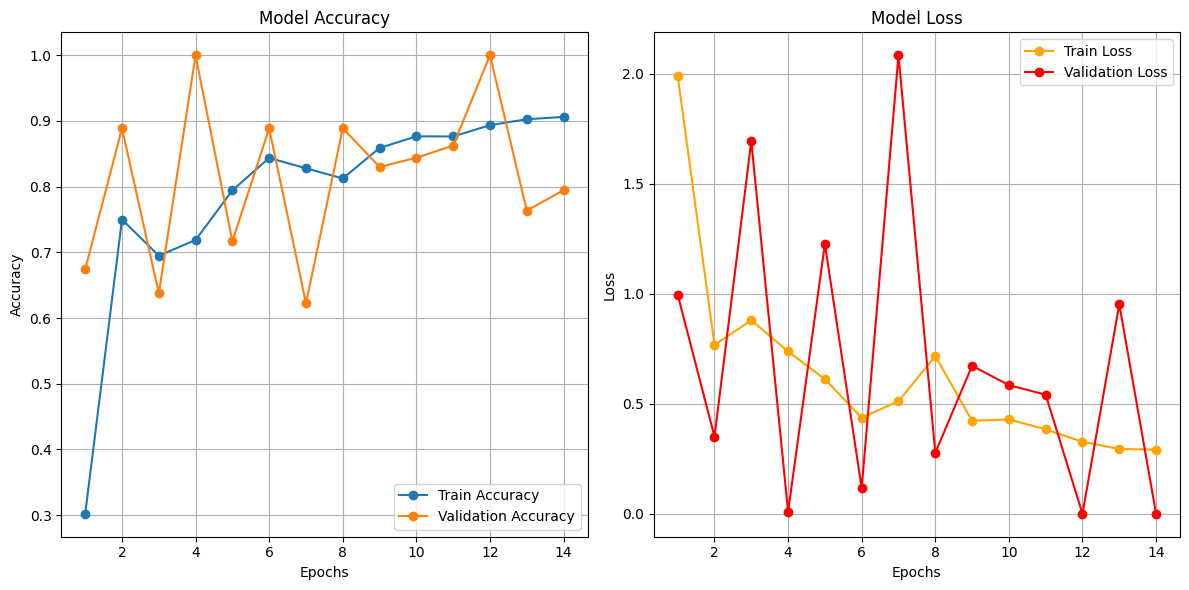

In [ ]:
import matplotlib.pyplot as plt

# All epochs and corresponding values extracted from your logs
epochs = list(range(1, 19))  # Total epochs (assuming 18 based on logs provided)
train_accuracy = [
    0.3021, 0.7500, 0.6949, 0.7188, 0.7944, 0.8438, 0.8279, 0.8125,
    0.8589, 0.8766, 0.8764, 0.8936, 0.9026, 0.9062
]
val_accuracy = [
    0.6742, 0.8889, 0.6377, 1.0000, 0.7168, 0.8889, 0.6224, 0.8889,
    0.8300, 0.8440, 0.8625, 1.0000, 0.7635, 0.7946
]
train_loss = [
    1.9900, 0.7679, 0.8802, 0.7381, 0.6121, 0.4371, 0.5119, 0.7174,
    0.4231, 0.4293, 0.3840, 0.3277, 0.2948, 0.2915
]
val_loss = [
    0.9967, 0.3509, 1.6943, 0.0091, 1.2268, 0.1169, 2.0848, 0.2770,
    0.6730, 0.5850, 0.5416, 3.0351e-04, 0.9527, 1.0508e-04
]

# Extend epochs to match your data
epochs = list(range(1, len(train_accuracy) + 1))

# Plot Accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Train Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Train Loss', marker='o', color='orange')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o', color='red')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()
